In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(columns=['day', 'month', 'year'],inplace=True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes'] = df['Classes'].str.strip()

In [9]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [10]:
df['Classes'] = df['Classes'].map({'fire':0, 'not fire':1})

In [11]:
df['Classes'].value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

In [12]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


Independent and Dependent features

In [13]:
X = df.drop('FWI',axis=1)
y = df['FWI']

In [14]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,1,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,0,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,1,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,1,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,1,1


In [15]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [16]:
type(X) # Independent is in 2D array/DataFrame. No issue!

pandas.core.frame.DataFrame

In [17]:
type(y) # dependent is in 1D/Series array. No issue!

pandas.core.series.Series

Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.25,random_state=42)

In [19]:
X_train.shape, X_test.shape

((182, 11), (61, 11))

In [20]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,-0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,-0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,-0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,-0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,-0.612239,0.114897
Classes,-0.542141,0.456876,0.082570,0.369357,-0.781259,-0.617273,-0.543581,-0.742977,-0.612239,1.000000,-0.188837


<Axes: >

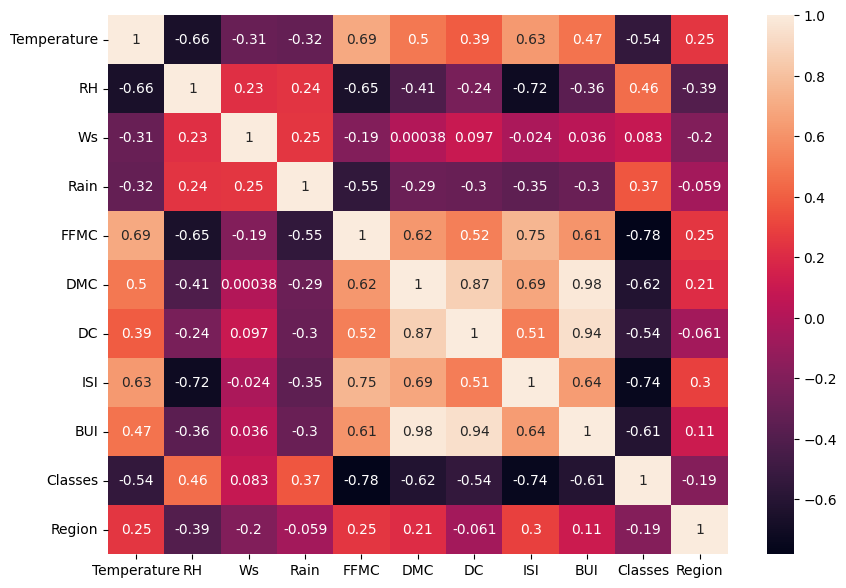

In [21]:
plt.figure(figsize=(10,7))
sns.heatmap(X_train.corr(),annot=True)

In [22]:
# check multicolinearity with threshold
def correlation(dataset,threshold):
    col_corr = set()  # variables with correlation higher than threshold
    corr_matrix = dataset.corr()
    for i in range(len(dataset.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
                    

In [23]:
# threshold set by domain expertise
corr_features = correlation(X_train,0.85)

In [24]:
# drop those features with corr > 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [25]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

Standardization

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)

In [28]:
X_test_scaled = scaler.transform(X_test)

Box plot to understand of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

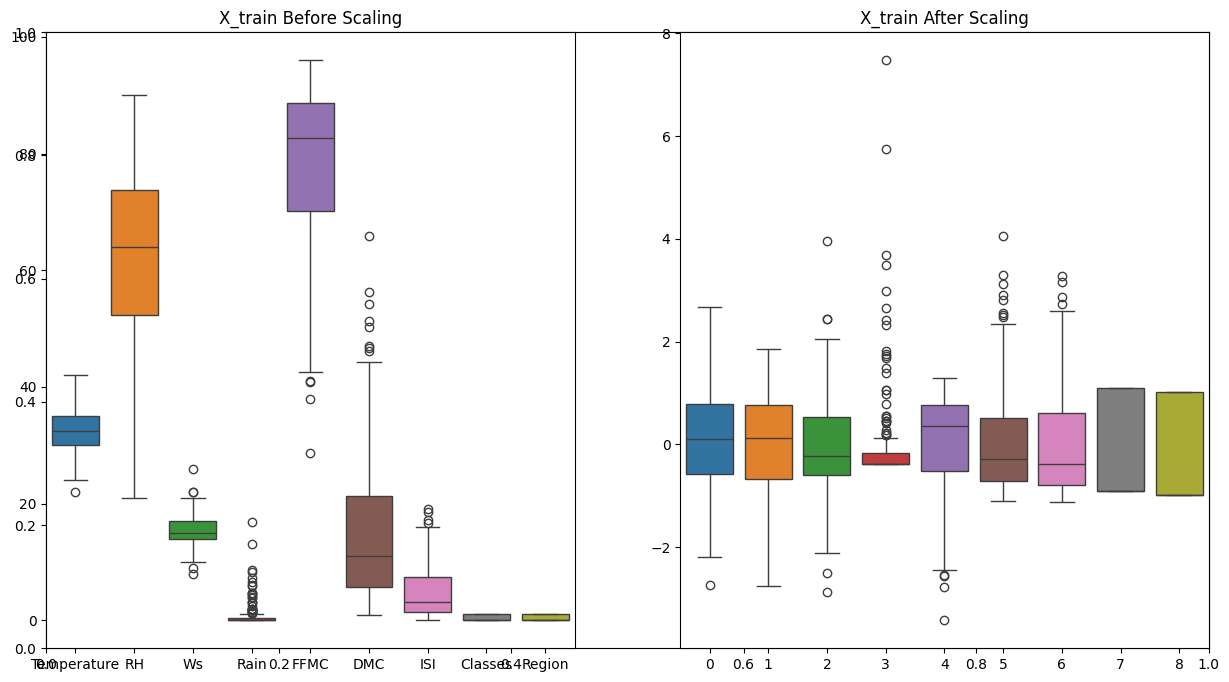

In [29]:
plt.subplots(figsize=(15,8))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression(n_jobs=-1)

In [31]:
linear_regression.fit(X_train_scaled,y_train)

LinearRegression(n_jobs=-1)

In [32]:
linear_regression.coef_

array([-0.03634495, -0.17441065,  0.00703214, -0.04108155, -0.82319823,
        3.6982583 ,  4.84057298, -0.40422124, -0.39259928])

In [33]:
linear_regression.intercept_

np.float64(7.156043956043957)

In [34]:
y_pred = linear_regression.predict(X_test_scaled)

In [35]:
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

Performance Analysis

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [37]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)
adj_r2_score = 1 - (1-r2_score)*((y_test.shape[0]-1)/(y_test.shape[0]-X_test.shape[1]-1))

In [38]:
X_test.shape[1]

9

In [39]:
y_test.shape[0]

61

In [40]:
len(y_test)

61

In [41]:
print('MAE :',mae)
print('MSE :' ,mse)
print('RMSE :' ,rmse)
print('R-Squared :' ,r2_score)
print('Adjusted R-Squared :' ,adj_r2_score)

MAE : 0.5468236465249976
MSE : 0.6742766873791577
RMSE : 0.821143524226525
R-Squared : 0.9847657384266951
Adjusted R-Squared : 0.9820773393255237


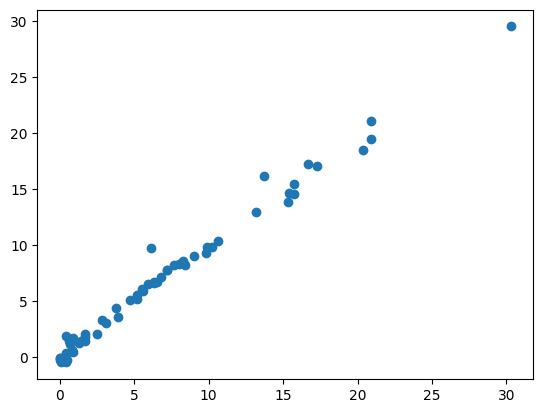

In [42]:
plt.scatter(y_test,y_pred)

Lasso Regression

MAE : 1.133175994914409
MSE : 2.248345891897477
RMSE : 1.4994485292591662
R-Squared : 0.9492020263112388
Adjusted R-Squared : 0.9402376780132222


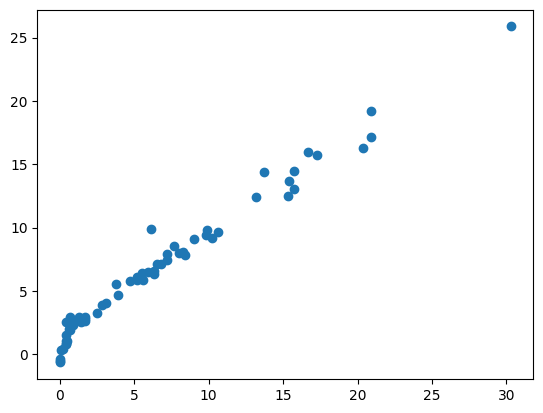

In [43]:
from sklearn.linear_model import Lasso
lasso =Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)
adj_r2_score = 1 - (1-r2_score)*((y_test.shape[0]-1)/(y_test.shape[0]-X_test.shape[1]-1))

print('MAE :',mae)
print('MSE :' ,mse)
print('RMSE :' ,rmse)
print('R-Squared :' ,r2_score)
print('Adjusted R-Squared :' ,adj_r2_score)

plt.scatter(y_test,y_pred)

Ridge Regression

MAE : 0.5642305340105688
MSE : 0.6949198918152072
RMSE : 0.8336185529456547
R-Squared : 0.9842993364555513
Adjusted R-Squared : 0.9815286311241781


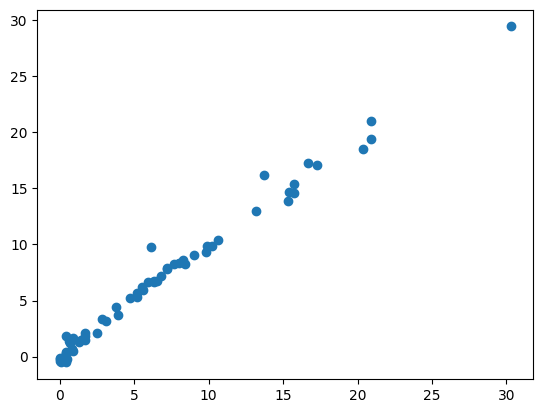

In [44]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)
adj_r2_score = 1 - (1-r2_score)*((y_test.shape[0]-1)/(y_test.shape[0]-X_test.shape[1]-1))

print('MAE :',mae)
print('MSE :' ,mse)
print('RMSE :' ,rmse)
print('R-Squared :' ,r2_score)
print('Adjusted R-Squared :' ,adj_r2_score)

plt.scatter(y_test,y_pred)

Elastic Net Regreesion

MAE : 1.8822353634896
MSE : 5.5172511010252245
RMSE : 2.3488829474933874
R-Squared : 0.8753460589519703
Adjusted R-Squared : 0.8533483046493768


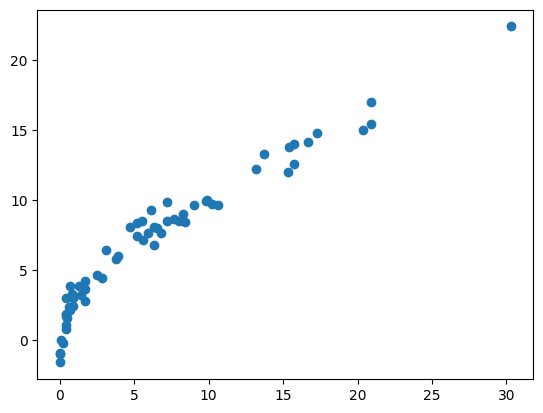

In [45]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train_scaled,y_train)
y_pred = elasticnet.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)
adj_r2_score = 1 - (1-r2_score)*((y_test.shape[0]-1)/(y_test.shape[0]-X_test.shape[1]-1))

print('MAE :',mae)
print('MSE :' ,mse)
print('RMSE :' ,rmse)
print('R-Squared :' ,r2_score)
print('Adjusted R-Squared :' ,adj_r2_score)

plt.scatter(y_test,y_pred)

Cross Validation Lasso

In [46]:
from sklearn.linear_model import LassoCV
lassoCV =LassoCV(cv=5)
lassoCV.fit(X_train_scaled,y_train)
y_pred = lassoCV.predict(X_test_scaled)

In [47]:
lassoCV.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

MAE : 0.6199701158263432
MSE : 0.7924995554743625
RMSE : 0.8902244410677357
R-Squared : 0.9820946715928275
Adjusted R-Squared : 0.9789349077562677


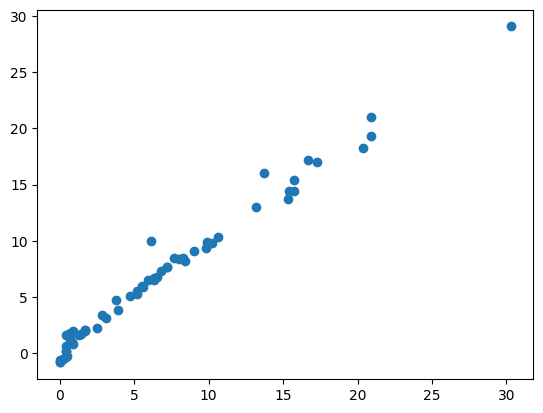

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)
adj_r2_score = 1 - (1-r2_score)*((y_test.shape[0]-1)/(y_test.shape[0]-X_test.shape[1]-1))

print('MAE :',mae)
print('MSE :' ,mse)
print('RMSE :' ,rmse)
print('R-Squared :' ,r2_score)
print('Adjusted R-Squared :' ,adj_r2_score)

plt.scatter(y_test,y_pred)

Ridge Cross Validation

In [49]:
from sklearn.linear_model import RidgeCV
ridgeCV =RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled,y_train)
y_pred = ridgeCV.predict(X_test_scaled)

MAE : 0.5642305340105688
MSE : 0.6949198918152072
RMSE : 0.8336185529456547
R-Squared : 0.9842993364555513
Adjusted R-Squared : 0.9815286311241781


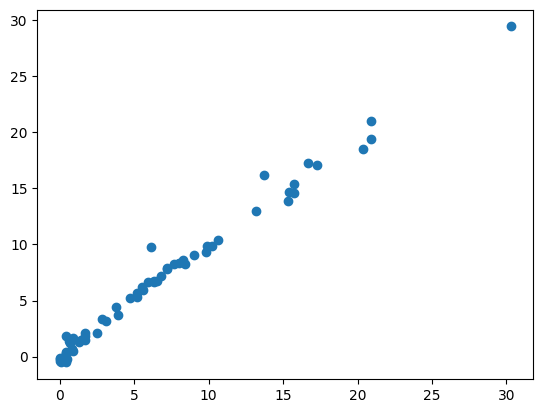

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)
adj_r2_score = 1 - (1-r2_score)*((y_test.shape[0]-1)/(y_test.shape[0]-X_test.shape[1]-1))

print('MAE :',mae)
print('MSE :' ,mse)
print('RMSE :' ,rmse)
print('R-Squared :' ,r2_score)
print('Adjusted R-Squared :' ,adj_r2_score)

plt.scatter(y_test,y_pred)

Elastic Net Cross Validation

In [52]:
from sklearn.linear_model import ElasticNetCV
elasticnetCV =ElasticNetCV(cv=5)
elasticnetCV.fit(X_train_scaled,y_train)
y_pred = elasticnetCV.predict(X_test_scaled)

MAE : 0.6575946731430901
MSE : 0.8222830416276258
RMSE : 0.906798236449336
R-Squared : 0.9814217587854941
Adjusted R-Squared : 0.978143245629993


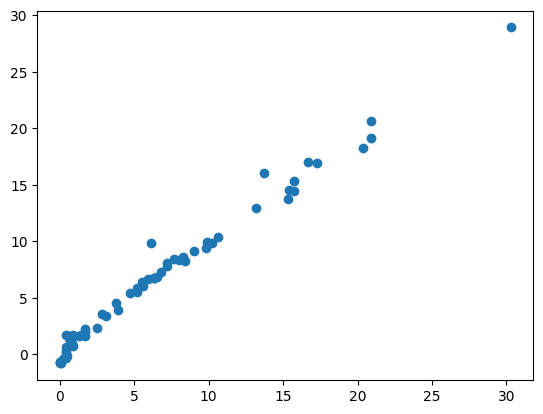

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,y_pred)
adj_r2_score = 1 - (1-r2_score)*((y_test.shape[0]-1)/(y_test.shape[0]-X_test.shape[1]-1))

print('MAE :',mae)
print('MSE :' ,mse)
print('RMSE :' ,rmse)
print('R-Squared :' ,r2_score)
print('Adjusted R-Squared :' ,adj_r2_score)

plt.scatter(y_test,y_pred)